# EDA For Offensive Language Classification

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from collections import Counter
nltk.download('stopwords')

from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/balamurugan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [280]:
tamil_font_path = "/System/Library/Fonts/Supplemental/Tamil MN.ttc"
tamil_font = fm.FontProperties(fname=tamil_font_path)

### Lets import the tamil dataset 

In [281]:
df = pd.read_csv('Dataset/mal_full_offensive_train.csv')

df.head()

,Text,Labels
0,പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ് അല്ലാതെ സ്വന്തം രാജവയത് അല്ല,Not_offensive
1,ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്‌ അടി,Not_offensive
2,ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ Royal Mech ആടാ ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal Mech ആടാ,Not_offensive
3,Sushin syam Shaiju khalid Midhun manual,Not_offensive
4,J A K E S. B EJ O Y !!!,Not_offensive


### Now lets check for null

In [282]:
df.isnull().sum()

Text      0
Labels    0
dtype: int64

So the data is clean without any null values

### Lets check for the classes

In [283]:
set(df['Labels'])

{'Not_offensive',
 'Offensive_Targeted_Insult_Group',
 'Offensive_Targeted_Insult_Individual',
 'Offensive_Untargetede',
 'not-malayalam'}

We have 6 main classes but they wanted output to be 4 classes

In [284]:
print('Not_offensive: ')
print(df[df['Labels']=='Not_offensive'].head(5)['Text'].values[:],"\n")
print('Offensive_Targeted_Insult_Group: ')
print(df[df['Labels']=='Offensive_Targeted_Insult_Group'].head(5)['Text'].values[:],"\n")
print('Offensive_Targeted_Insult_Individual: ')
print(df[df['Labels']=='Offensive_Targeted_Insult_Individual'].head(5)['Text'].values[:],"\n")
print('Offensive_Targeted_Insult_Other: ')
print(df[df['Labels']=='Offensive_Targeted_Insult_Other'].head(5)['Text'].values[:],"\n")
print('Offensive_Untargetede: ')
print(df[df['Labels']=='Offensive_Untargetede'].head(5)['Text'].values[:],"\n")
print('not-Tamil: ')
print(df[df['Labels']=='not-Tamil'].head(5)['Text'].values[:],"\n")

Not_offensive: 
['പലദേശം. പല ഭാഷ ഒരേ ഒരു രാജാവ്  അല്ലാതെ  സ്വന്തം രാജവയത് അല്ല'
 'ഈ ഓണം ഏട്ടനും പിള്ളേർക്ക് ഉള്ളതാണ് എന്ന് ഉള്ളവർ ലൈക്\u200c അടി'
 'ആരണ്ട ആരണ്ട തലുണ്ടാകാണാ ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ Royal Mech ആടാ  ആരണ്ട ആരണ്ട മീശ പിരിക്കുന്ന ആരണ്ട ഞാൻ ആണ്ട ഞാൻ ആണ്ട ഞാൻ royal Mech ആടാ'
 'Sushin syam  Shaiju khalid  Midhun manual' 'J A K E S.   B EJ O Y !!!'] 

Offensive_Targeted_Insult_Group: 
['ജിമിട്ടൊളികൾ ഇപ്പോളെ unlike അടിച്ചു തുടങ്ങി  അസുരൻ loading..'
 'Muriyandikal pannikuutatam pole thurimezhukuvansllooscenes are rememmbering pulimurugan'
 'ആരും  കണ്ടേക്കരുതേ'
 'ഗുഹൻ ഫാൻസ്\u200c ഡിസ്\u200cലൈക്ക് അടിച്ചു തകർക്കുവാണല്ലോ'
 'aa dislike  mikkathum  mohan lal fans aayirikkum'] 

Offensive_Targeted_Insult_Individual: 
['Jobi jorge padam ano. Potti mone'
 'Nth bhashayado ith vech ketti malabr bhasha samsarikkunnu. Mohanlal malabarine kaliyakkunnu'
 'Iyyalkke rest cheyyanulla time aayilla.. kanda oola padagalilellam abinayiche vila poi paavam..'
 'Al veruppikkal Mammotty ude vere oru ad

### Now lets try to clean the data

In [305]:
stw = stopwords.words('english') + ['like','love','fans','movie','dislike','trailer']

In [306]:
def clean(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text, flags=re.UNICODE)
    text = " ".join([word for word in text.split() if word not in stw])
    return text

In [307]:
%%time
print("Before Clean: \n",df.head()['Text'].values[:])
df['Text'] = df['Text'].apply(clean)
print("After Clean: \n",df.head()['Text'].values[:])

Before Clean: 
 ['പലദശ പല ഭഷ ഒര ഒര രജവ അലലത സവനത രജവയത അലല'
 'ഈ ഓണ ഏടടന പളളർകക ഉളളതണ എനന ഉളളവർ ലക അട'
 'ആരണട ആരണട തലണടകണ ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal mech ആട ആരണട ആരണട മശ പരകകനന ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal mech ആട'
 'sushin syam shaiju khalid midhun manual' 'j k e b ej']
After Clean: 
 ['പലദശ പല ഭഷ ഒര ഒര രജവ അലലത സവനത രജവയത അലല'
 'ഈ ഓണ ഏടടന പളളർകക ഉളളതണ എനന ഉളളവർ ലക അട'
 'ആരണട ആരണട തലണടകണ ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal mech ആട ആരണട ആരണട മശ പരകകനന ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal mech ആട'
 'sushin syam shaiju khalid midhun manual' 'j k e b ej']
CPU times: user 241 ms, sys: 17.3 ms, total: 258 ms
Wall time: 315 ms


### Now lets check for Term Frequency analysis

In [308]:
def corpus(text):
    text_list = text.split()
    return text_list

In [309]:
df['Text_list'] = df['Text'].apply(corpus)
df.head(10)

,Text,Labels,Text_list
0,പലദശ പല ഭഷ ഒര ഒര രജവ അലലത സവനത രജവയത അലല,Not_offensive,"[പലദശ, പല, ഭഷ, ഒര, ഒര, രജവ, അലലത, സവനത, രജവയത, അലല]"
1,ഈ ഓണ ഏടടന പളളർകക ഉളളതണ എനന ഉളളവർ ലക അട,Not_offensive,"[ഈ, ഓണ, ഏടടന, പളളർകക, ഉളളതണ, എനന, ഉളളവർ, ലക, അട]"
2,ആരണട ആരണട തലണടകണ ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal mech ആട ആരണട ആരണട മശ പരകകനന ആരണട ഞൻ ആണട ഞൻ ആണട ഞൻ royal mech ആട,Not_offensive,"[ആരണട, ആരണട, തലണടകണ, ആരണട, ഞൻ, ആണട, ഞൻ, ആണട, ഞൻ, royal, mech, ആട, ആരണട, ആരണട, മശ, പരകകനന, ആരണട, ഞൻ, ആണട, ഞൻ, ആണട, ഞൻ, royal, mech, ആട]"
3,sushin syam shaiju khalid midhun manual,Not_offensive,"[sushin, syam, shaiju, khalid, midhun, manual]"
4,j k e b ej,Not_offensive,"[j, k, e, b, ej]"
5,pwoli item padam kananda ennu karuthiyatha pakshe ini kaanum,Not_offensive,"[pwoli, item, padam, kananda, ennu, karuthiyatha, pakshe, ini, kaanum]"
6,oru ratchasan feel kittitu ullalo bgm athra adipoliyano,Not_offensive,"[oru, ratchasan, feel, kittitu, ullalo, bgm, athra, adipoliyano]"
7,super casting,Not_offensive,"[super, casting]"
8,ഷലകക നറ നലല ടസർ ആയടട പല ടരള നടനന ലലടടൻ ഫൻസന കടടയര നലലര തരചചട തനന ആയരനന ബഗ ബരദർ നറ ടരയലർ,Not_offensive,"[ഷലകക, നറ, നലല, ടസർ, ആയടട, പല, ടരള, നടനന, ലലടടൻ, ഫൻസന, കടടയര, നലലര, തരചചട, തനന, ആയരനന, ബഗ, ബരദർ, നറ, ടരയലർ]"
9,നറമമ ഇജജത trailor uffftrailor ethegilum padam pwoliyo pwoli,Not_offensive,"[നറമമ, ഇജജത, trailor, uffftrailor, ethegilum, padam, pwoliyo, pwoli]"


### Lets convert it into list of words
- To Analyse the frequancy for offensive

In [318]:
offdf = df[(df['Labels']!='Not_offensive') & (df['Labels']!='not-malayalam')]
offdf.head(5)

,Text,Labels,Text_list
23,jobi jorge padam ano potti mone,Offensive_Targeted_Insult_Individual,"[jobi, jorge, padam, ano, potti, mone]"
44,ജമടടളകൾ ഇപപള unlike അടചച തടങങ അസരൻ loading,Offensive_Targeted_Insult_Group,"[ജമടടളകൾ, ഇപപള, unlike, അടചച, തടങങ, അസരൻ, loading]"
45,muriyandikal pannikuutatam pole thurimezhukuvansllooscenes rememmbering pulimurugan,Offensive_Targeted_Insult_Group,"[muriyandikal, pannikuutatam, pole, thurimezhukuvansllooscenes, rememmbering, pulimurugan]"
46,nth bhashayado ith vech ketti malabr bhasha samsarikkunnu mohanlal malabarine kaliyakkunnu,Offensive_Targeted_Insult_Individual,"[nth, bhashayado, ith, vech, ketti, malabr, bhasha, samsarikkunnu, mohanlal, malabarine, kaliyakkunnu]"
92,ആര കണടകകരത,Offensive_Targeted_Insult_Group,"[ആര, കണടകകരത]"


In [319]:
corpus = []
for i in range(offdf.shape[0]):
    corpus += offdf['Text_list'].iloc[i]
len(corpus)

5713

In [320]:
corpus[:10]

['jobi',
 'jorge',
 'padam',
 'ano',
 'potti',
 'mone',
 'ജമടടളകൾ',
 'ഇപപള',
 'unlike',
 'അടചച']

In [321]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('padam', 51),
 ('oru', 50),
 ('ഈ', 44),
 ('ആണ', 37),
 ('എനന', 32),
 ('പട', 30),
 ('ഇത', 29),
 ('adicha', 25),
 ('nalla', 22),
 ('എനത', 22)]

In [322]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

/var/folders/ys/19b63m0164d7n0v0p6t_gr980000gn/T/ipykernel_78155/3464029207.py:12: UserWarning: Glyph 3336 (\N{MALAYALAM LETTER II}) missing from font(s) Tamil MN.
  plt.tight_layout()
/var/folders/ys/19b63m0164d7n0v0p6t_gr980000gn/T/ipykernel_78155/3464029207.py:12: UserWarning: Matplotlib currently does not support Malayalam natively.
  plt.tight_layout()
/var/folders/ys/19b63m0164d7n0v0p6t_gr980000gn/T/ipykernel_78155/3464029207.py:12: UserWarning: Glyph 3334 (\N{MALAYALAM LETTER AA}) missing from font(s) Tamil MN.
  plt.tight_layout()
/var/folders/ys/19b63m0164d7n0v0p6t_gr980000gn/T/ipykernel_78155/3464029207.py:12: UserWarning: Glyph 3363 (\N{MALAYALAM LETTER NNA}) missing from font(s) Tamil MN.
  plt.tight_layout()
/var/folders/ys/19b63m0164d7n0v0p6t_gr980000gn/T/ipykernel_78155/3464029207.py:12: UserWarning: Glyph 3342 (\N{MALAYALAM LETTER E}) missing from font(s) Tamil MN.
  plt.tight_layout()
/var/folders/ys/19b63m0164d7n0v0p6t_gr980000gn/T/ipykernel_78155/3464029207.py:12: Us

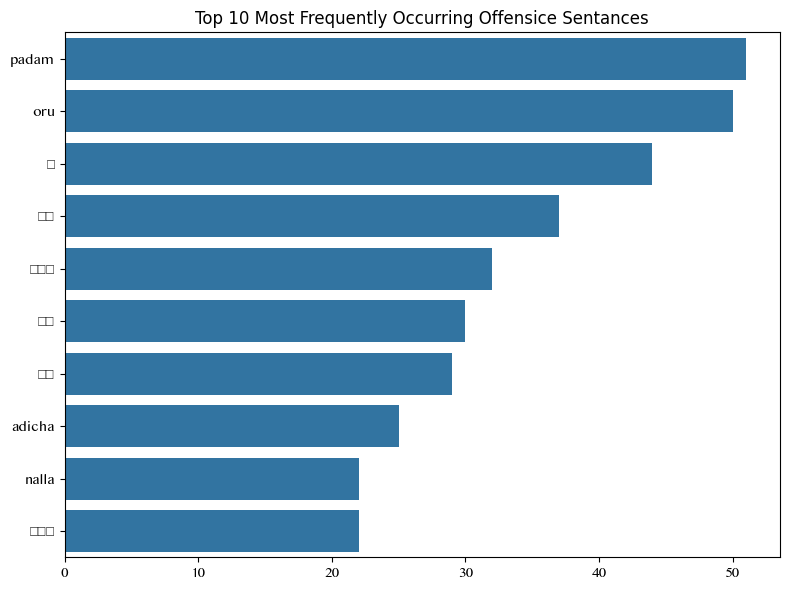

In [323]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=freq, y=words)

for label in ax.get_yticklabels():
    label.set_fontproperties(tamil_font)

for label in ax.get_xticklabels():
    label.set_fontproperties(tamil_font)

plt.title('Top 10 Most Frequently Occurring Offensice Sentances')

plt.tight_layout()
plt.show()